In [2]:
from env import MazeEnv, MoveAction

In [3]:
m = MazeEnv(10, 2)
m.rooms

[(0, 0),
 (0, 1),
 (1, 0),
 (2, 0),
 (2, 1),
 (2, -1),
 (1, -1),
 (0, 2),
 (3, 0),
 (2, -2)]

In [5]:
m.__dict__

{'action_space': Discrete(4),
 'observation_space': Tuple(MultiDiscrete([10 10]), MultiDiscrete([10 10]), MultiBinary(2), MultiBinary(2)),
 'n_rooms': 10,
 'n_agents': 2,
 'rooms': [(0, 0),
  (0, 1),
  (1, 0),
  (2, 0),
  (2, 1),
  (2, -1),
  (1, -1),
  (0, 2),
  (3, 0),
  (2, -2)],
 'room_map': defaultdict(dict,
             {(0, 0): {<MoveAction.DOWN: 1>: (0, 1),
               <MoveAction.RIGHT: 3>: (1, 0)},
              (0, 1): {<MoveAction.UP: 0>: (0, 0),
               <MoveAction.DOWN: 1>: (0, 2)},
              (1, 0): {<MoveAction.LEFT: 2>: (0, 0),
               <MoveAction.RIGHT: 3>: (2, 0)},
              (2, 0): {<MoveAction.LEFT: 2>: (1, 0),
               <MoveAction.DOWN: 1>: (2, 1),
               <MoveAction.UP: 0>: (2, -1),
               <MoveAction.RIGHT: 3>: (3, 0)},
              (2, 1): {<MoveAction.UP: 0>: (2, 0)},
              (2, -1): {<MoveAction.DOWN: 1>: (2, 0),
               <MoveAction.LEFT: 2>: (1, -1),
               <MoveAction.UP: 0>: (2, -2)},
  

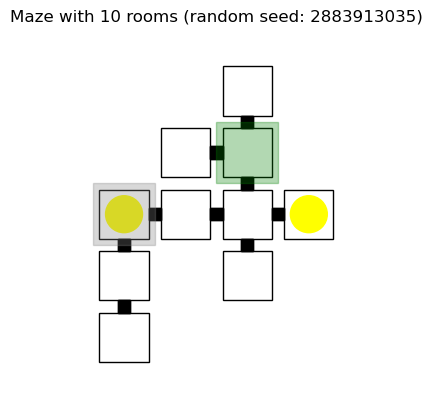

State:  ([(2, 0), (0, 0)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


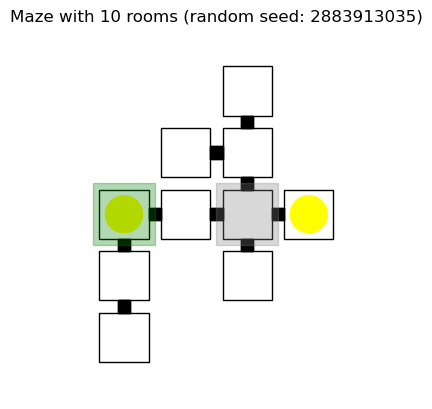

State:  ([(2, 0), (0, 1)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


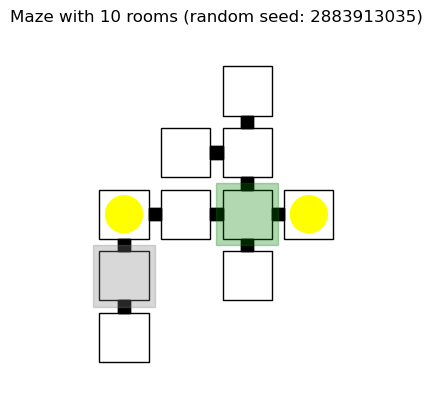

State:  ([(2, 1), (0, 1)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


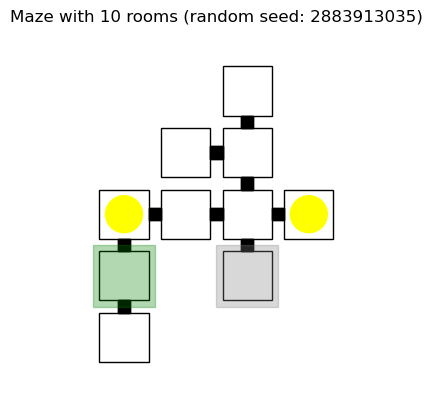

State:  ([(2, 1), (0, 0)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


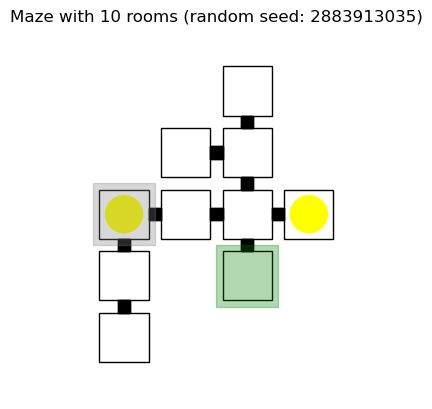

State:  ([(2, 0), (0, 0)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


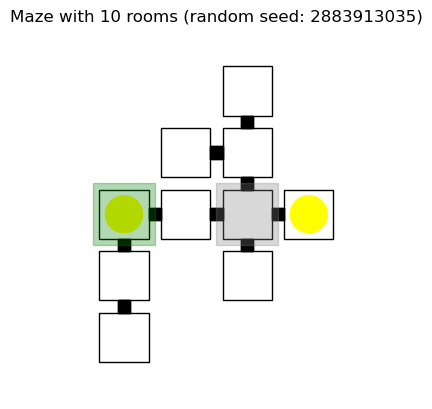

State:  ([(2, 0), (0, 0)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


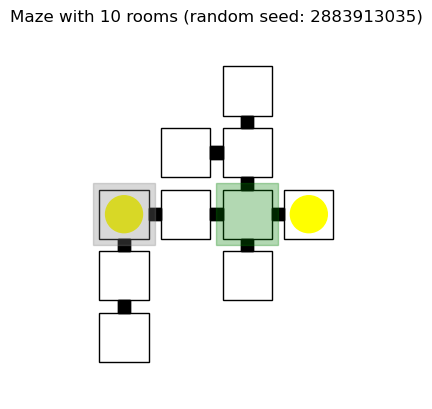

State:  ([(1, 0), (0, 0)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


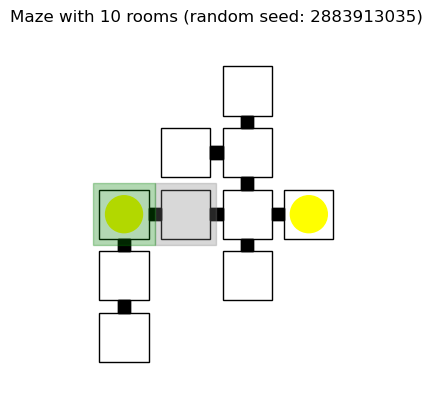

State:  ([(1, 0), (0, 0)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


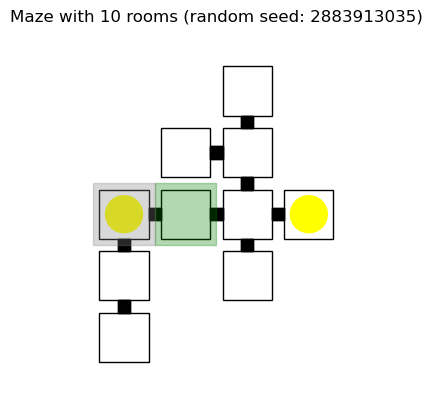

State:  ([(0, 0), (0, 0)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


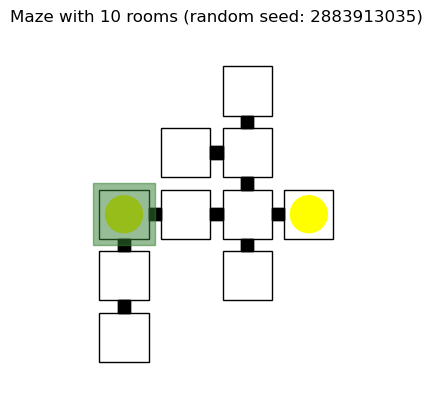

State:  ([(0, 0), (0, 1)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


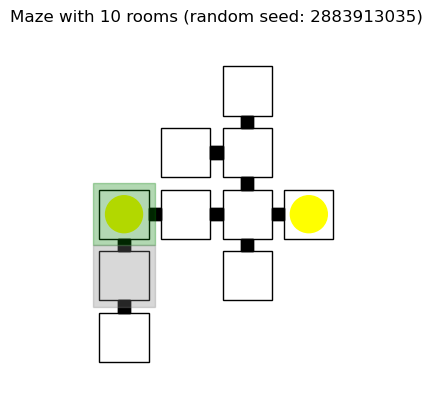

State:  ([(1, 0), (0, 1)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


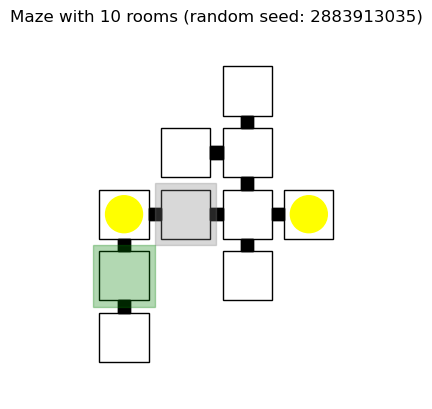

State:  ([(1, 0), (0, 0)], [(3, 0), (0, 0)], array([0., 0.]), array([1., 1.]))


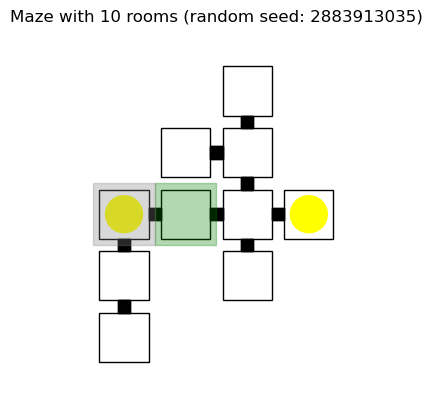

In [8]:
m.reset()
while True:
    m.render()
    action = input("Action: ")
    # determine action direction based on input being w, a, s, or d
    a = 0
    if action == 'w':
        a = 0
    if action == 'a':
        a = 2
    if action == 's':
        a = 1
    if action == 'd':
        a = 3
    if action == 'q':
        break
    state, reward, done, truncated, info = m.step(MoveAction(a))
    print("State: ", state)
    if done:
        break